# Multivariate time series forecasting

In [1]:
# loading essential libraries first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
file_path = 'C:/Users/Javi/Desktop/cryptocurrency_predictor/data/features.csv'
cols_to_use = ['date', 'vader_no_outliers', 'bitcoin', 'volume', 'close']
data = pd.read_csv(file_path, index_col='date', usecols=cols_to_use, parse_dates=True)
data.rename(columns={'vader_no_outliers':'sentiment_score', 'bitcoin':'g_trends'}, inplace=True)
data.info()
data.head(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 677 entries, 2021-02-21 00:00:00 to 2021-03-20 23:00:00
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   close            677 non-null    float64
 1   volume           677 non-null    float64
 2   sentiment_score  677 non-null    float64
 3   g_trends         677 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 26.4 KB


,close,volume,sentiment_score,g_trends
date,,,,
2021-02-21 00:00:00,55834.95,2949.777561,154319.02855,72
2021-02-21 01:00:00,56347.69,2125.263288,102026.76434,72
2021-02-21 02:00:00,56318.08,2201.031649,182005.34381,72


In [3]:
data.reset_index(drop=True, inplace=True)

## Vector Autoregression model (VAR)

[Tutorial](https://towardsdatascience.com/multivariate-time-series-forecasting-653372b3db36)

[Tutorial 2](https://towardsdatascience.com/simple-multivariate-time-series-forecasting-7fa0e05579b2)

### Causality

We are going to run Granger Causality test to check any causality between the dependent varaible and the independent variables.

In [4]:
from statsmodels.tsa.stattools import grangercausalitytests

def granger_test(series1, series2, n_lags=1):
    """It performs Granger Causality test. It returns test results.
    
    Parameters
    ----------
    series1 : pd.Series. it is supposed to be caused by series2
    series2 : pd.Series.
    """
    df = pd.DataFrame(data=zip(series1.values, series2.values))
    grangercausalitytests(df, n_lags)

#### Bitcoin close price vs Twitter sentiment scores

In [5]:
# Do sentiment scores cause Bitcoin price variations?
granger_test(data['close'], data['sentiment_score'], 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9821  , p=0.3220  , df_denom=673, df_num=1
ssr based chi2 test:   chi2=0.9865  , p=0.3206  , df=1
likelihood ratio test: chi2=0.9858  , p=0.3208  , df=1
parameter F test:         F=0.9821  , p=0.3220  , df_denom=673, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9593  , p=0.3837  , df_denom=670, df_num=2
ssr based chi2 test:   chi2=1.9330  , p=0.3804  , df=2
likelihood ratio test: chi2=1.9302  , p=0.3809  , df=2
parameter F test:         F=0.9593  , p=0.3837  , df_denom=670, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6370  , p=0.5914  , df_denom=667, df_num=3
ssr based chi2 test:   chi2=1.9310  , p=0.5869  , df=3
likelihood ratio test: chi2=1.9282  , p=0.5874  , df=3
parameter F test:         F=0.6370  , p=0.5914  , df_denom=667, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5486  , p=0.7001  

In [6]:
# Do Bitcoin prices cause sentiment scores variations?
granger_test(data['sentiment_score'], data['close'], 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3789  , p=0.2407  , df_denom=673, df_num=1
ssr based chi2 test:   chi2=1.3851  , p=0.2392  , df=1
likelihood ratio test: chi2=1.3837  , p=0.2395  , df=1
parameter F test:         F=1.3789  , p=0.2407  , df_denom=673, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9025  , p=0.4061  , df_denom=670, df_num=2
ssr based chi2 test:   chi2=1.8184  , p=0.4028  , df=2
likelihood ratio test: chi2=1.8160  , p=0.4033  , df=2
parameter F test:         F=0.9025  , p=0.4061  , df_denom=670, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0696  , p=0.1030  , df_denom=667, df_num=3
ssr based chi2 test:   chi2=6.2739  , p=0.0990  , df=3
likelihood ratio test: chi2=6.2449  , p=0.1003  , df=3
parameter F test:         F=2.0696  , p=0.1030  , df_denom=667, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6167  , p=0.1683  

#### Bitcoin close price vs Google trends on Bitcoin

In [7]:
# Do Google trends on Bitcoin cause Bitcoin price variations?
granger_test(data['close'], data['g_trends'], 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0029  , p=0.9568  , df_denom=673, df_num=1
ssr based chi2 test:   chi2=0.0030  , p=0.9567  , df=1
likelihood ratio test: chi2=0.0030  , p=0.9567  , df=1
parameter F test:         F=0.0029  , p=0.9568  , df_denom=673, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3207  , p=0.7258  , df_denom=670, df_num=2
ssr based chi2 test:   chi2=0.6461  , p=0.7239  , df=2
likelihood ratio test: chi2=0.6458  , p=0.7240  , df=2
parameter F test:         F=0.3207  , p=0.7258  , df_denom=670, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2260  , p=0.8783  , df_denom=667, df_num=3
ssr based chi2 test:   chi2=0.6850  , p=0.8767  , df=3
likelihood ratio test: chi2=0.6847  , p=0.8768  , df=3
parameter F test:         F=0.2260  , p=0.8783  , df_denom=667, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1475  , p=0.9641  

In [8]:
# Do Bitcoin price variations cause Google trends on Bitcoin
granger_test(data['g_trends'], data['close'], 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2254  , p=0.6351  , df_denom=673, df_num=1
ssr based chi2 test:   chi2=0.2264  , p=0.6342  , df=1
likelihood ratio test: chi2=0.2264  , p=0.6342  , df=1
parameter F test:         F=0.2254  , p=0.6351  , df_denom=673, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2954  , p=0.7443  , df_denom=670, df_num=2
ssr based chi2 test:   chi2=0.5952  , p=0.7426  , df=2
likelihood ratio test: chi2=0.5949  , p=0.7427  , df=2
parameter F test:         F=0.2954  , p=0.7443  , df_denom=670, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6285  , p=0.1815  , df_denom=667, df_num=3
ssr based chi2 test:   chi2=4.9367  , p=0.1765  , df=3
likelihood ratio test: chi2=4.9187  , p=0.1778  , df=3
parameter F test:         F=1.6285  , p=0.1815  , df_denom=667, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2630  , p=0.2832  

After running Granger Causality tests on our variables, it looks like Bitcoin close hourly prices are causing trends in Google searches and sentiment scores variations on Social Media (Twitter) rahter than the other way around, as we thought at the beginning.

### Check for Stationarity

A Stationary series is one whose mean and variance do not change with time, therefore, a non-stationary series has trends. The Vector Autoregression model (VAR) requires the data to be stationary. We will have to get rid of stationarity.

Augmented Dickey-Fuller (ADF) test is used to check for stationarity.

In [9]:
# We split our data in training and test sets
obs = round(len(data) * 0.2)

data_train = data[:-obs]
data_test = data[-obs:]

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
def adf_test(series):
    """It performs Augmented Dickey-Fuller test on a pd.Series and prints the results"""
    adf = adfuller(series)
    print('ADF Statistic: %.3f' % adf[0])
    print('p-value: %.2f' % adf[1])
    if adf[1] < 0.05:
        print('Series is Stationary')
    else:
        print('Series is Non-Stationary')

In [12]:
for column in data_train.columns:
    print('\t' + column)
    adf_test(data_train[column])
    print('-' * 25)

	close
ADF Statistic: -1.165
p-value: 0.69
Series is Non-Stationary
-------------------------
	volume
ADF Statistic: -6.893
p-value: 0.00
Series is Stationary
-------------------------
	sentiment_score
ADF Statistic: -11.450
p-value: 0.00
Series is Stationary
-------------------------
	g_trends
ADF Statistic: -3.315
p-value: 0.01
Series is Stationary
-------------------------


We can conclude after running Augmented Dickey-Fuller test on our variables that Bitcoin close price is non-stationary, whereas the independent variables are, as they seemed to be.

For time series modeling, data needs to be stationary — meaning if there is a trend in the data we need to get rid of it. We can do so by taking differences.

In [13]:
# We make the series stationary by taking differences
data_diff = data_train.diff().dropna()

In [14]:
# We check for stationarity again
for column in data_diff.columns:
    print('\t' + column)
    adf_test(data_diff[column])
    print('-' * 25)

	close
ADF Statistic: -25.152
p-value: 0.00
Series is Stationary
-------------------------
	volume
ADF Statistic: -9.017
p-value: 0.00
Series is Stationary
-------------------------
	sentiment_score
ADF Statistic: -9.264
p-value: 0.00
Series is Stationary
-------------------------
	g_trends
ADF Statistic: -7.706
p-value: 0.00
Series is Stationary
-------------------------


Now we've got our stationarity problem solved. Let's keep going!

### Build the model

In [15]:
from statsmodels.tsa.api import VAR

model = VAR(data_diff)
results = model.fit(maxlags=15, ic='aic')
results.summary()

lag_order = results.k_ar
predicted = results.forecast(data_diff.values[-lag_order:], obs)
forecast = pd.DataFrame(data=predicted,
                        columns=data.columns)
# Forecasting
forecast

C:\Users\Javi\Anaconda3\envs\crypto-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,close,volume,sentiment_score,g_trends
0,97.091919,-602.927734,278616.240601,1.094321
1,-467.854583,-7.153958,41931.195185,-0.876549
2,-3.955346,624.417415,-40319.287695,-0.894879
3,-102.431261,-1251.402466,-123308.760693,1.455317
4,-104.196855,1783.856468,240244.581974,2.954384
...,...,...,...,...
130,1.538997,4.985184,515.972480,0.016131
131,1.538997,4.985184,515.972486,0.016131
132,1.538997,4.985184,515.972482,0.016131
133,1.538997,4.985184,515.972480,0.016131


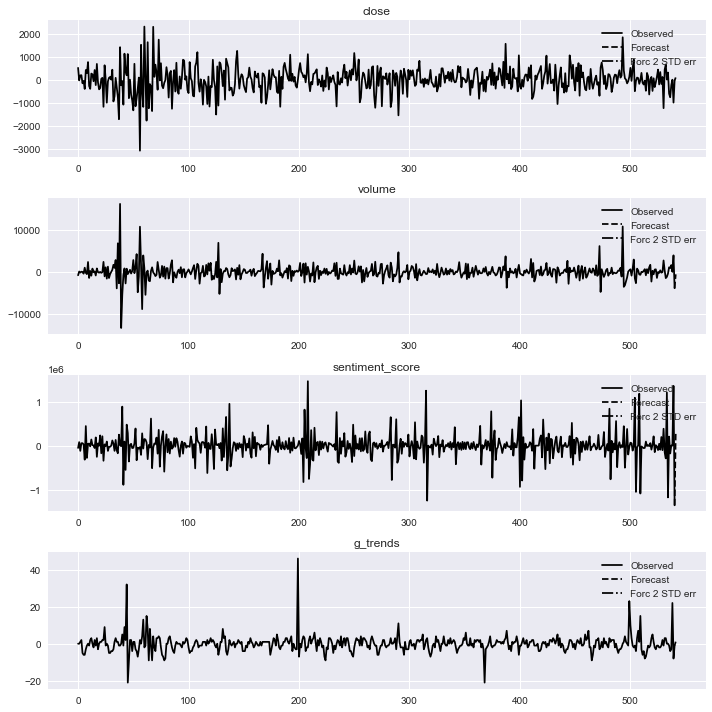

In [16]:
# Ploting results
p1 = results.plot_forecast(1)
p1.tight_layout()

In [17]:
# Inverting the diff transformation
def invert_diff(df_train_diff, df_forecast):
    """It undoes diff transformation."""
    for col in df_train_diff.columns:
        df_forecast[str(col)] = df_train_diff[col].iloc[-1] + df_forecast[str(col)].cumsum()

    return df_forecast

forecast_values = invert_diff(data_train, forecast)

In [23]:
forecast_values

,close,volume,sentiment_score,g_trends
0,57854.791919,4372.393998,421375.309071,74.094321
1,57386.937337,4365.240040,463306.504257,73.217772
2,57382.981991,4989.657455,422987.216561,72.322893
3,57280.550730,3738.254990,299678.455869,73.778211
4,57176.353875,5522.111458,539923.037843,76.732595
...,...,...,...,...
130,57560.182079,5673.628931,502688.474677,74.815889
131,57561.721076,5678.614115,503204.447163,74.832020
132,57563.260073,5683.599299,503720.419645,74.848151
133,57564.799070,5688.584484,504236.392125,74.864282


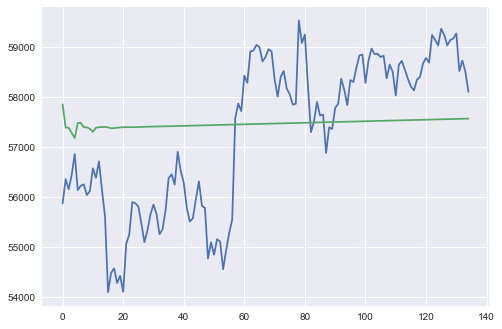

In [40]:
plt.plot(data['close'][-obs:].values)
plt.plot(forecast_values['close'])